In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
data = pd.read_csv(r"C:\Users\Ashwath\Desktop\Work\Projekt\fatal-police-shootings-data.csv")
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
data.shape

(6728, 17)

In [5]:
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [6]:
data.isnull().sum()

id                           0
name                       270
date                         0
manner_of_death              0
armed                      206
age                        324
gender                       5
race                       875
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       519
body_camera                  0
longitude                  318
latitude                   318
is_geocoding_exact           0
dtype: int64

# Exploratory Data Analysis

In [7]:
data2 = data.groupby(['state']).id.agg(["count"])
data2 = data2.sort_values(by = ["count"], ascending = True)
data2.tail()

,count
state,
GA,246
AZ,305
FL,437
TX,601
CA,988


In [8]:
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [9]:
data.describe(include=['object', 'bool'])

,name,date,manner_of_death,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
count,6458,6728,6728,6522,6723,5853,6728,6728,6728,6728,6209,6728,6728
unique,6437,2317,2,98,2,6,2863,51,2,3,4,2,2
top,Michael Johnson,2018-06-29,shot,gun,M,W,Los Angeles,CA,False,attack,Not fleeing,False,True
freq,3,9,6395,3872,6423,2969,105,988,5213,4333,4007,5796,6710


In [10]:
data["date"] = pd.to_datetime(data.date)
data["Year"] = data.date.dt.year
data["Month"] = data.date.dt.month
data.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Year,Month
6723,7335,Brian Michael Price,2021-11-06,shot,piece of wood,45.0,M,NaN,Chesapeake,VA,False,attack,Other,False,-78.691,36.653,True,2021,11
6724,7337,Jabbar Muhammad,2021-11-06,shot,knife,21.0,M,NaN,Joliet,IL,False,attack,Not fleeing,False,-88.074,41.494,True,2021,11
6725,7338,NaN,2021-11-06,shot,gun,NaN,M,NaN,Long Branch,NJ,False,attack,Not fleeing,False,-73.991,40.300,True,2021,11
6726,7331,Andrew Dzwonchyk,2021-11-07,shot,vehicle,40.0,M,NaN,Union Township,PA,False,attack,NaN,False,-76.569,40.484,True,2021,11
6727,7334,NaN,2021-11-07,shot,gun,NaN,M,NaN,Knowlton Township,NJ,False,attack,Not fleeing,False,-75.108,40.948,True,2021,11


In [11]:
#Function to categorize individaul in their respective age groups

def convert(age):
    if age < 18:
        return "child"
    if age > 18 and age < 40:
        return "adult"
    else:
        return "old"
data["Group"] = data.age.apply(convert)
data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Year,Month,Group
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1,old
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1,old
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1,adult
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1,adult
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1,adult
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True,2015,1,old
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True,2015,1,adult
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True,2015,1,adult
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True,2015,1,adult
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True,2015,1,old


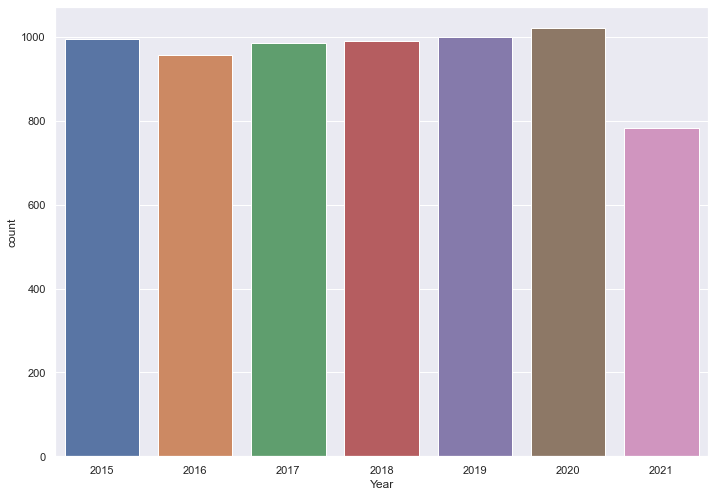

In [12]:
sns.set_theme(style = "darkgrid")
ax = sns.countplot(x = "Year", data = data)

<AxesSubplot:xlabel='age'>

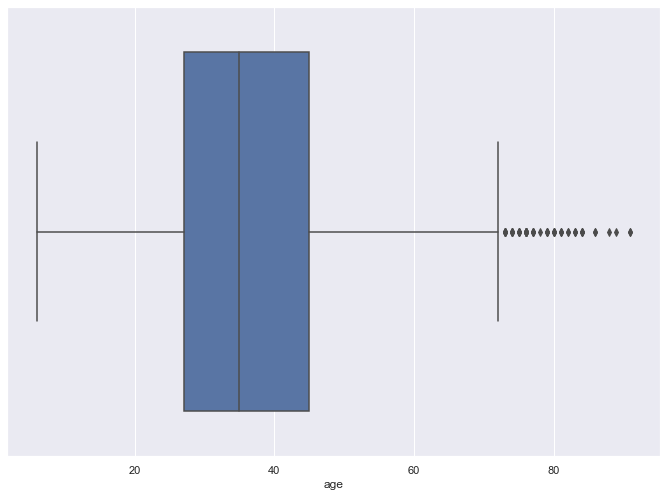

In [13]:
sns.boxplot(x = 'age', data = data)

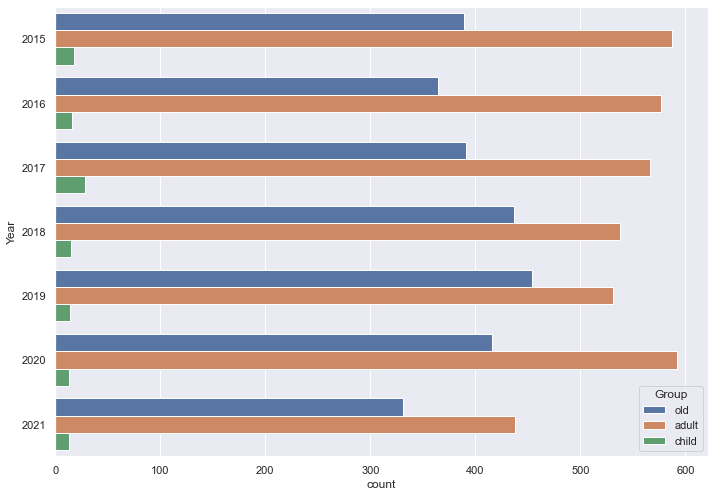

In [14]:
sns.set_theme(style = "darkgrid")
ax = sns.countplot(y = "Year", hue = "Group", data = data)

In [15]:
data_crosstab1 = pd.crosstab([data.flee, data.threat_level], 
                             data.manner_of_death, margins = False)
print(data_crosstab1)

manner_of_death           shot  shot and Tasered
flee        threat_level                        
Car         attack         690                13
            other          344                13
            undetermined    29                 0
Foot        attack         537                27
            other          261                17
            undetermined    18                 1
Not fleeing attack        2527               104
            other         1168               119
            undetermined    87                 2
Other       attack         151                11
            other           76                 4
            undetermined     9                 1


In [16]:
data_crosstab2 = pd.crosstab([data.flee, data.race], 
                             data.manner_of_death, margins = False)
print(data_crosstab2)

manner_of_death   shot  shot and Tasered
flee        race                        
Car         A       10                 1
            B      238                 8
            H      178                 2
            N       10                 0
            O       10                 0
            W      471                13
Foot        A        9                 1
            B      286                17
            H      142                 8
            N       15                 2
            O        5                 0
            W      275                14
Not fleeing A       73                 6
            B      803                54
            H      588                42
            N       48                 1
            O       25                 4
            W     1807               100
Other       A        1                 0
            B       56                 5
            H       52                 2
            N        3                 1
            O   

In [17]:
data_crosstab3 = pd.crosstab([data.signs_of_mental_illness, data.threat_level], 
                             data.manner_of_death, margins = False)
print(data_crosstab3)

manner_of_death                       shot  shot and Tasered
signs_of_mental_illness threat_level                        
False                   attack        3280               113
                        other         1530               105
                        undetermined   181                 4
True                    attack         886                54
                        other          487                57
                        undetermined    31                 0


In [18]:
data_crosstab4 = pd.crosstab([data.Group, data.threat_level], 
                             data.manner_of_death, margins = False)
print(data_crosstab4)

manner_of_death     shot  shot and Tasered
Group threat_level                        
adult attack        2339               108
      other         1175                86
      undetermined   118                 3
child attack          61                 3
      other           46                 4
      undetermined     3                 0
old   attack        1766                56
      other          796                72
      undetermined    91                 1


In [19]:
data_crosstab5 = pd.crosstab([data.Group, data.signs_of_mental_illness, data.threat_level], 
                             data.manner_of_death, margins = False)
print(data_crosstab5)

manner_of_death                             shot  shot and Tasered
Group signs_of_mental_illness threat_level                        
adult False                   attack        1896                75
                              other          903                56
                              undetermined    98                 3
      True                    attack         443                33
                              other          272                30
                              undetermined    20                 0
child False                   attack          49                 2
                              other           41                 3
                              undetermined     3                 0
      True                    attack          12                 1
                              other            5                 1
old   False                   attack        1335                36
                              other          586              

In [20]:
data_crosstab6 = pd.crosstab([data.body_camera, data.signs_of_mental_illness, data.threat_level], 
                             data.manner_of_death, margins = False)
print(data_crosstab6)

manner_of_death                                   shot  shot and Tasered
body_camera signs_of_mental_illness threat_level                        
False       False                   attack        2889                93
                                    other         1305                84
                                    undetermined   161                 2
            True                    attack         750                43
                                    other          400                45
                                    undetermined    24                 0
True        False                   attack         391                20
                                    other          225                21
                                    undetermined    20                 2
            True                    attack         136                11
                                    other           87                12
                                    undetermined   

In [21]:
data_crosstab7 = pd.crosstab([data.Group, data.body_camera, data.threat_level], 
                             data.manner_of_death, margins = False)
print(data_crosstab7)

manner_of_death                 shot  shot and Tasered
Group body_camera threat_level                        
adult False       attack        2009                86
                  other          976                68
                  undetermined   102                 2
      True        attack         330                22
                  other          199                18
                  undetermined    16                 1
child False       attack          53                 1
                  other           33                 2
                  undetermined     1                 0
      True        attack           8                 2
                  other           13                 2
                  undetermined     2                 0
old   False       attack        1577                49
                  other          696                59
                  undetermined    82                 0
      True        attack         189                 7
          

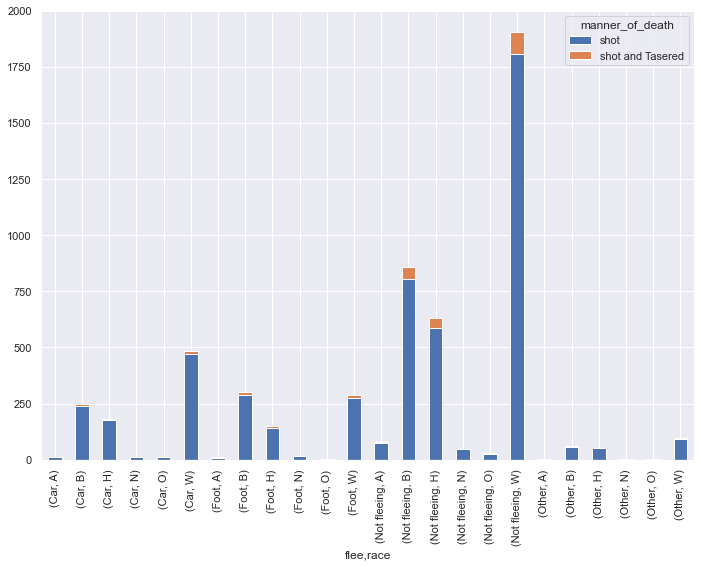

In [22]:
pl = data_crosstab2.plot(kind = 'bar', stacked = True)

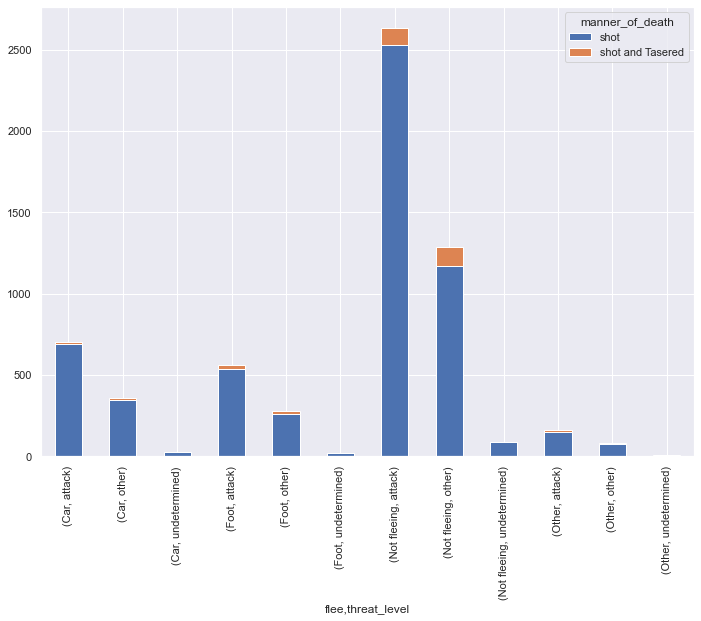

In [23]:
pl = data_crosstab1.plot(kind = 'bar', stacked = True)

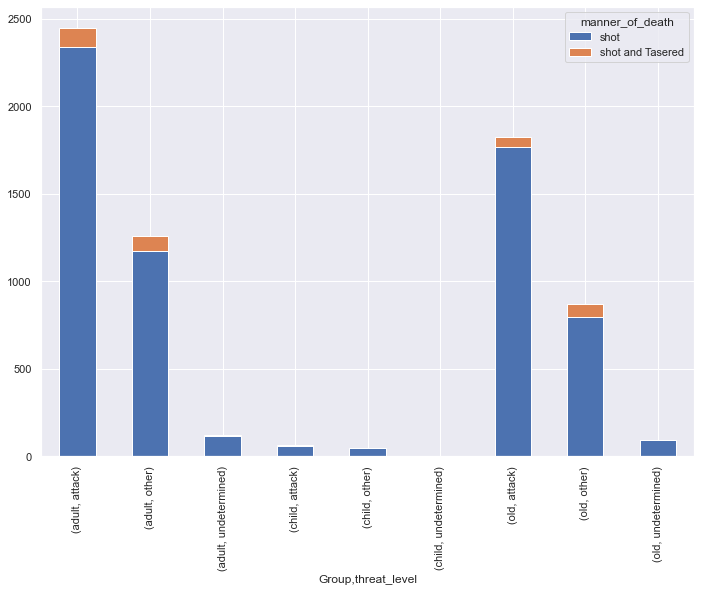

In [24]:
pl = data_crosstab4.plot(kind = 'bar', stacked = True)

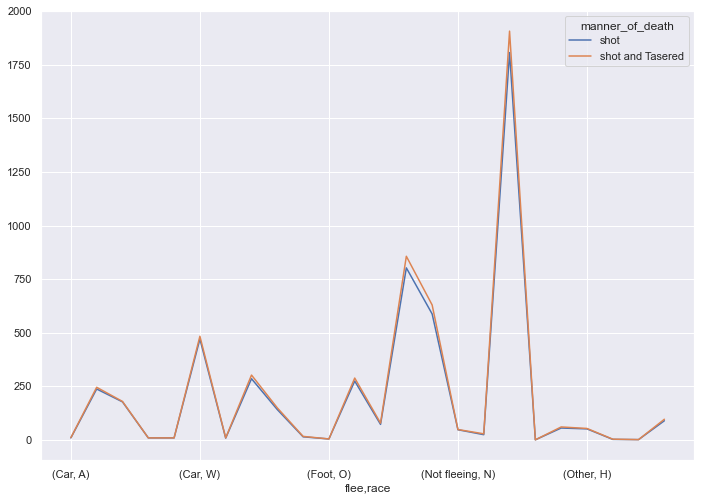

In [25]:
pl = data_crosstab2.plot(kind = 'line', stacked = True)

(<Figure size 842.4x595.44 with 3 Axes>,
 {('False', 'True'): (0.0, 0.0, 0.8571884927325325, 0.21701299326606277),
  ('False', 'False'): (0.0,
   0.2203352524022754,
   0.8571884927325325,
   0.7796647475977247),
  ('True', 'True'): (0.8621636171106419,
   0.0,
   0.13783638288935818,
   0.270557369569247),
  ('True', 'False'): (0.8621636171106419,
   0.2738796287054596,
   0.13783638288935818,
   0.7261203712945403)})

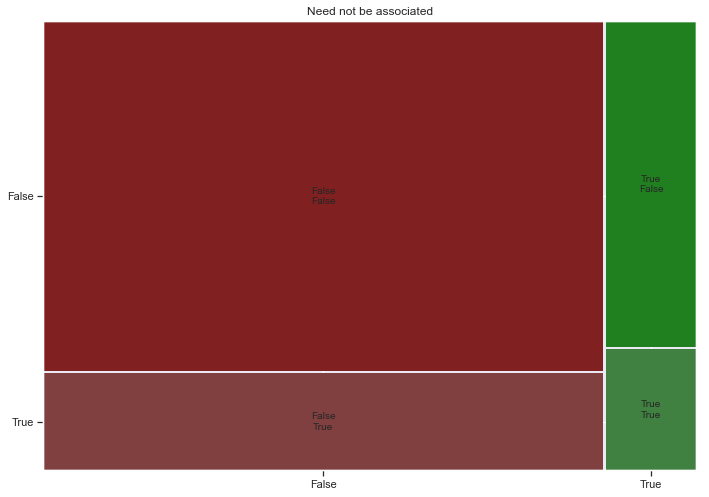

In [26]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['body_camera', 'signs_of_mental_illness'],title = "Need not be associated")

In [27]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install pygeohash

Note: you may need to restart the kernel to use updated packages.


In [102]:
import pygeohash as gh
data['geohash']=data.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=2), axis=1)
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Year,Month,Group,geohash
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,old,c2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,old,c2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,adult,9y
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,adult,9q
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,adult,9x


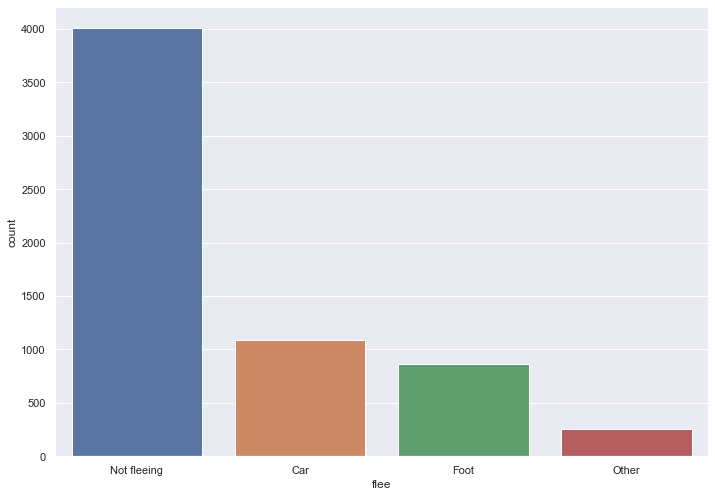

In [30]:
ax = sns.countplot(x = "flee", data = data)

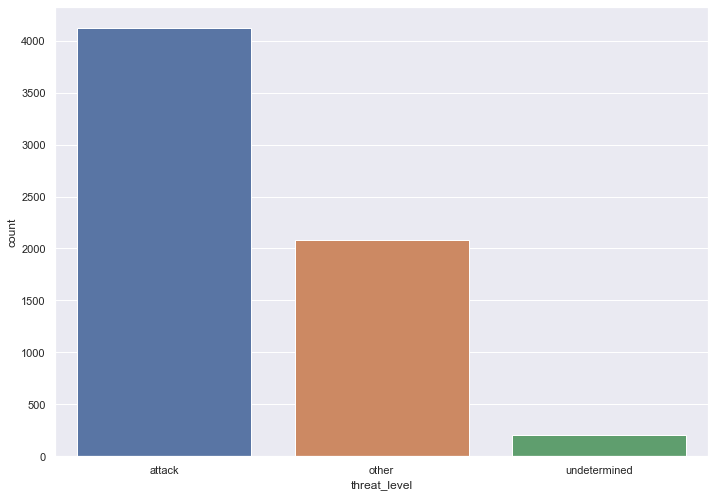

In [134]:
ax = sns.countplot(x = "threat_level", data = data)

# Missing Value analysis

In [107]:
data.armed.value_counts().head(30)

gun                    3679
knife                   931
unarmed                 410
toy weapon              226
vehicle                 205
undetermined            184
unknown weapon           84
machete                  50
Taser                    34
sword                    25
ax                       24
gun and knife            22
hammer                   19
baseball bat             19
screwdriver              17
gun and vehicle          16
sharp object             15
metal pipe               15
hatchet                  14
BB gun                   14
box cutter               13
gun and car              11
scissors                  9
piece of wood             8
crossbow                  8
vehicle and gun           8
shovel                    7
pipe                      7
rock                      6
straight edge razor       5
Name: armed, dtype: int64

In [32]:
data.flee.value_counts()

Not fleeing    4007
Car            1089
Foot            861
Other           252
Name: flee, dtype: int64

In [104]:
data.geohash.value_counts()

9q    897
dn    780
9v    613
dp    567
9y    490
dj    488
dr    439
9t    319
9x    287
c2    243
dq    231
dh    215
9w    203
9r    141
9z    138
9m    133
cb     51
9u     40
c8     28
bd     24
87     22
8e     12
9p     11
f0     11
be     11
f2      6
c0      5
f1      1
c4      1
bs      1
bg      1
b7      1
Name: geohash, dtype: int64

In [262]:
df = data[data['longitude'].notna()]

In [340]:
df1 =df[['armed', 'race','body_camera','signs_of_mental_illness', 'flee', 'threat_level', 'Group']]
df1.head()

,armed,race,body_camera,signs_of_mental_illness,flee,threat_level,Group
0,gun,A,False,True,Not fleeing,attack,old
1,gun,W,False,False,Not fleeing,attack,old
2,unarmed,H,False,False,Not fleeing,other,adult
3,toy weapon,W,False,True,Not fleeing,attack,adult
4,nail gun,H,False,False,Not fleeing,attack,adult


In [341]:
df1 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
df1.tail()

,armed,race,body_camera,signs_of_mental_illness,flee,threat_level,Group
6723,piece of wood,W,False,False,Other,attack,old
6724,knife,W,False,False,Not fleeing,attack,adult
6725,gun,W,False,False,Not fleeing,attack,old
6726,vehicle,W,False,False,Not fleeing,attack,old
6727,gun,W,False,False,Not fleeing,attack,old


In [342]:
df1.isna().sum()

armed                      0
race                       0
body_camera                0
signs_of_mental_illness    0
flee                       0
threat_level               0
Group                      0
dtype: int64

# Machine Learning

In [311]:
#Creating Dummy Variables
df1 = pd.get_dummies(df1, columns=['armed','flee', 'race','Group','threat_level','body_camera','signs_of_mental_illness'])
df1.head()

,armed_Airsoft pistol,armed_BB gun,armed_BB gun and vehicle,armed_Taser,armed_air conditioner,armed_air pistol,armed_ax,armed_barstool,armed_baseball bat,armed_baseball bat and bottle,...,Group_adult,Group_child,Group_old,threat_level_attack,threat_level_other,threat_level_undetermined,body_camera_False,body_camera_True,signs_of_mental_illness_False,signs_of_mental_illness_True
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [312]:
#threat level identification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
threat = df1.threat_level_attack
vital = df1.drop(['threat_level_attack'], axis =1)
threat_train,threat_test,vital_train,vital_test = train_test_split(threat,vital,test_size = 0.3)
print("shape of original dataset :", df1.shape)
print("shape of input - training set", threat_train.shape)
print("shape of output - training set", vital_train.shape)
print("shape of input - testing set", threat_test.shape)
print("shape of output - testing set", vital_test.shape)

shape of original dataset : (6410, 115)
shape of input - training set (4487,)
shape of output - training set (4487, 114)
shape of input - testing set (1923,)
shape of output - testing set (1923, 114)


In [273]:
df1.columns

Index(['armed_Airsoft pistol', 'armed_BB gun', 'armed_BB gun and vehicle',
       'armed_Taser', 'armed_air conditioner', 'armed_air pistol', 'armed_ax',
       'armed_barstool', 'armed_baseball bat', 'armed_baseball bat and bottle',
       ...
       'Group_adult', 'Group_child', 'Group_old', 'threat_level_attack',
       'threat_level_other', 'threat_level_undetermined', 'body_camera_False',
       'body_camera_True', 'signs_of_mental_illness_False',
       'signs_of_mental_illness_True'],
      dtype='object', length=115)

In [293]:
import statsmodels.api as sm
logit_model=sm.Logit(threat_train,vital_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: -0.000000
         Iterations: 35


C:\Users\Ashwath\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


LinAlgError: Singular matrix

In [313]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(df1)
print (pca.explained_variance_ratio_)
df1 = pca.transform(df1)

[0.1641768  0.15633372 0.11855177 0.09254924 0.07687543 0.06823033
 0.06620609 0.05639715 0.04272949 0.02917413 0.01801955 0.01479763
 0.0143065  0.01357746 0.00935108 0.00775756 0.00634481]


In [326]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,algorithm='ball_tree')
knn.fit(vital_train, threat_train)
    
# Compute training and test data accuracy
train_accuracy = knn.score(vital_train, threat_train)
test_accuracy = knn.score(vital_test, threat_test)

In [338]:
test_train_acc =[test_accuracy,train_accuracy]
test_train_acc

[0.9734789391575663, 0.9794963227100513]